In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
country = data['CountryName'].unique().tolist()
len(country)

247

In [5]:
country_codes = data['CountryCode'].unique().tolist()
len(country_codes)

247

In [6]:
data[data['CountryCode'] == 'IDN'].any()

CountryName      True
CountryCode      True
IndicatorName    True
IndicatorCode    True
Year             True
Value            True
dtype: bool

In [7]:
years = data['Year'].unique().tolist()
len(years)

56

In [8]:
print(min(years), 'to', max(years))

1960 to 2015


# CO2 Emissions per capita and the Indonesia

In [9]:
#Pick CO2 Emissions for the Indonesia
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'IDN'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]

In [10]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11789,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.243805
36754,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.288720
64301,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.248447
92752,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.239681
121550,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.229361


## How emissions have changed over years

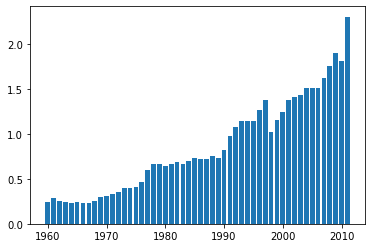

In [11]:
#pick year
years = stage['Year'].values
#value of CO2
CO2 = stage['Value'].values

plt.bar(years,CO2)
plt.show()

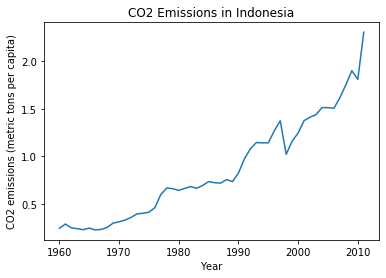

<Figure size 432x288 with 0 Axes>

In [12]:
#Using Line Plot
plt.plot(years, CO2)

#X Label
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#Title
plt.title('CO2 Emissions in Indonesia')

#plt.axis([1959,2015,0,25])

plt.show()
plt.savefig('CO2 Emissions vs Year (Indonesia).png')

Berdasarkan plot di atas, dapat diamati bahwa emisi CO2 di Indonesia mengalami kenaikan setiap tahun. Kenaikan emisi CO2 yang relatif tinggi terjadi pada rentang tahun 2000-2010.

## How distribution of emissions value in Indonesia

In [13]:
hist_data =stage['Value'].values
len(hist_data)

52

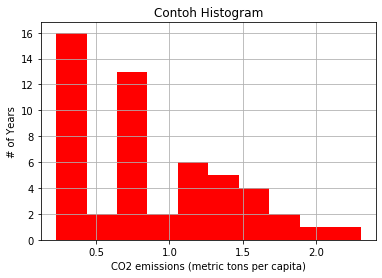

In [14]:
#Plot histogram
plt.hist(hist_data, 10, density=False, facecolor='Red')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Contoh Histogram')

plt.grid(True)
plt.show()

## How Indonesia's Number Relate to Others Country

In [15]:
#Select CO2 Emissions for all countries in 2015
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2010

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

co2_2010 = data[mask1 & mask2]
co2_2010.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839081,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,4.764912
4839627,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,10.004505
4840195,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,6.839720
4840843,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,5.453789
4841477,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,4.867541


For how many countries do we have emissions CO2 data in 2010

In [16]:
print(len(co2_2010))

232


# Plot Histogram of The Emissions Per Capita by Country

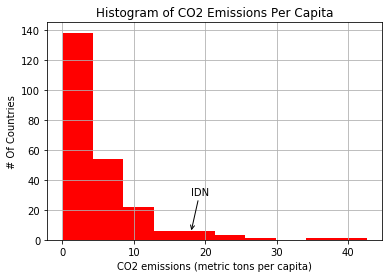

<Figure size 432x288 with 0 Axes>

In [17]:
fig, ax = plt.subplots()

ax.annotate('IDN',
           xy=(18,5), xycoords='data',
           xytext=(18,30), textcoords='data',
           arrowprops=dict(arrowstyle='->',
                         connectionstyle='arc3'),
           )

plt.hist(co2_2010['Value'], 10, density=False, facecolor='red')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# Of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

plt.grid(True)
plt.show()
plt.savefig('Histogram of CO2 Emissions per Capita (Indonesia).png')

Perbandingan emisi CO2 di Indonesia terhadap negara-negara lain dapat diamati pada histogram di atas. Emisi CO2 di Indonesia memiliki tingkat emisi CO2 yang relatif tinggi dibandingkan dengan negara-negara lain.

## Relationship between GDP and CO2 Emissions in Indonesia

In [18]:
#Select GDP per capita emissions in Indonesia
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'IDN'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11822,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,288.963670
36790,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,298.625695
64339,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,296.372284
92788,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,282.082945
121586,Indonesia,IDN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,284.100832


In [19]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11789,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.243805
36754,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.288720
64301,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.248447
92752,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.239681
121550,Indonesia,IDN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.229361


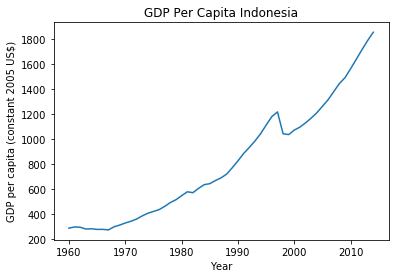

In [20]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('GDP Per Capita Indonesia')

plt.show()

## Comparing GDP Against CO2 Emissions (Per Capita)

In [21]:
print('GDP Min Year : ', gdp_stage['Year'].min(), 'GDP Max Year : ', gdp_stage['Year'].max())
print('CO2 Min Year : ', stage['Year'].min(), 'CO2 Max Year : ', stage['Year'].max())

GDP Min Year :  1960 GDP Max Year :  2014
CO2 Min Year :  1960 CO2 Max Year :  2011


In [22]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


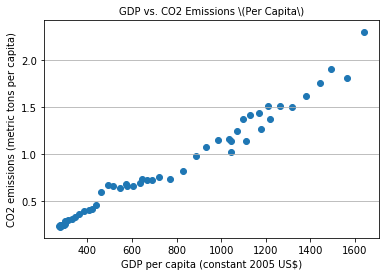

<Figure size 432x288 with 0 Axes>

In [23]:
%matplotlib inline

fig,axis = plt.subplots()

axis.yaxis.grid(True)
axis.set_title('GDP vs. CO2 Emissions \(Per Capita\)', fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0], fontsize=10)

x = gdp_stage_trunc['Value']
y = stage['Value']

axis.scatter(x,y)
plt.show()
plt.savefig('GDP vs CO2 Emissions Per Capita (Indonesia).png')

Dari hasil plot di atas dapat diamati bahwa, pertumbuhan GDP per capita setiap tahunnya juga dapat mempengaruhi CO2 emisi yang dihasilkan. Kenaikan emisi CO2 di Indonesia setiap tahunnya dipengaruhi oleh kenaikan GDP per capita setiap tahunnya. 

## Correlation Between GDP against CO2 Emissions (Per Capita)

In [24]:
np.corrcoef(gdp_stage_trunc['Value'], stage['Value'])

array([[1.        , 0.98770338],
       [0.98770338, 1.        ]])

Korelasi antara GDP per capita terhadap Emisi CO2 di Indonesia menunjukkan nilai 0.98. Hal ini menunjukkan secara umum kenaikan emisi CO2 di Indonesia sangat dipengaruhi oleh kenaikan GDP per capita setiap tahunnya.